In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Property_2019_1_13.csv')
df.head()

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,YearBlt,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint_x,PropertyCenterPoint_y
0,1004,69,32,5176,0.05597,1760,840.00000,152500.0,121600,0,...,1912,158000,5,2,1,1733,2628,0.359,-73.2122,44.46910
1,1005,25,21,5176,0.08242,2676,1436.00000,241900.0,94400,700,...,1899,231750,7,3,1,1733,2628,0.098,-73.2125,44.48854
2,1006,133,137,2150,0.00000,2184,1572.80005,268000.0,0,0,...,1986,381500,6,2,1,5042,1219,0.025,-73.2681,44.52157
3,1007,14,10,5176,0.09832,3699,2087.00000,340800.0,130100,0,...,1910,430000,8,4,1,5042,2628,0.174,-73.2051,44.48153
4,1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,...,2013,505683,103,53,26,1733,1219,0.000,-73.2258,44.48770


In [3]:
len(df)

4308

In [4]:
df.columns

Index(['FID', 'StreetNumber', 'StreetName', 'LandUse', 'CurrentAcres',
       'TotalGrossArea', 'FinishedArea', 'CurrentValue', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'BuildingType',
       'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SalePrice', 'NumofRooms',
       'NumofBedrooms', 'NumofUnits', 'ZoningCode', 'Foundation',
       'Depreciation', 'PropertyCenterPoint_x', 'PropertyCenterPoint_y'],
      dtype='object')

### A preliminary feature selection for machine learning is as follows.
#### 1.FID should not be used in any type of analysis. 
#### 2.Since StreetName, StreetNumber, ZoningCode are all location variables which are less significant in determining SalePrice than the coordinate variables, as seen in Statistical Analysis, we will not use them as features in machine learning. However, we will preserve PropertyCenterPoint_x and PropertyCenterPoint_y.
#### 3.It has been found in the data cleaning step that CurrentValue = CurrentLandValue+CurrentYardItemsValue+CurrentBuildingValue. CurrentValue and SalePrice is linearly related. We will preserve SalePrice, CurrentLandValue, CurrentYardItemsValue, CurrentBuildingValue but ignore CurrentValue in machine learning algorithms.
#### 4.Recall TotalGrossArea and FinishedArea are strongly linearly related, and that SalePrice depends more on FinishedArea than on TotalGrossArea based on the correlation matrix, we will use FinishedArea instead of TotalGrossArea as a feature in machine learning algorithms.
#### 5.Recall NumofRooms and NumofBedrooms are strongly linearly related, and that SalePrice depends more on NumofRooms than on NumofBedrooms based on the correlation matrix, we will use NumofRooms instead of NumofBedrooms as a feature in machine learning algorithms.

In [5]:
df_feature = df[['LandUse','CurrentAcres', 'TotalGrossArea', 'FinishedArea', 
                 'CurrentLandValue', 'CurrentYardItemsValue', 'CurrentBuildingValue',
                 'BuildingType', 'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SalePrice',
                 'NumofRooms', 'NumofUnits', 'Foundation',
                 'Depreciation', 'PropertyCenterPoint_x', 'PropertyCenterPoint_y']]
df_feature.head()

,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,BuildingType,HeatFuel,HeatType,Grade,YearBlt,SalePrice,NumofRooms,NumofUnits,Foundation,Depreciation,PropertyCenterPoint_x,PropertyCenterPoint_y
0,5176,0.05597,1760,840.00000,121600,0,30900.0,2168,1039,3893,5,1912,158000,5,1,2628,0.359,-73.2122,44.46910
1,5176,0.08242,2676,1436.00000,94400,700,146800.0,83,8187,4255,7,1899,231750,7,1,2628,0.098,-73.2125,44.48854
2,2150,0.00000,2184,1572.80005,0,0,268000.0,482,8187,4255,10,1986,381500,6,1,1219,0.025,-73.2681,44.52157
3,5176,0.09832,3699,2087.00000,130100,0,210700.0,2168,8187,3893,8,1910,430000,8,1,2628,0.174,-73.2051,44.48153
4,367,0.70154,62852,37977.00000,547700,51800,1306100.0,291,8187,4255,9,2013,505683,103,26,1219,0.000,-73.2258,44.48770


### The columns that orginally contain categorical data will be transformed by OneHotEncoding for better machine learning results.

#### Encode LandUse

In [6]:
LandUseCoded = pd.get_dummies(df_feature.LandUse,prefix='LandUse', drop_first=True)
df_feature = pd.concat([df_feature,LandUseCoded],axis=1)
df_feature.drop(['LandUse'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'BuildingType',
       'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SalePrice', 'NumofRooms',
       'NumofUnits', 'Foundation', 'Depreciation', 'PropertyCenterPoint_x',
       'PropertyCenterPoint_y', 'LandUse_8', 'LandUse_43', 'LandUse_45',
       'LandUse_117', 'LandUse_239', 'LandUse_285', 'LandUse_367',
       'LandUse_369', 'LandUse_1041', 'LandUse_2150', 'LandUse_5176'],
      dtype='object')

#### Encode BuildingType

In [7]:
BuildingTypeCoded = pd.get_dummies(df_feature.BuildingType,prefix='BuildingType', drop_first=True)
df_feature = pd.concat([df_feature,BuildingTypeCoded],axis=1)
df_feature.drop(['BuildingType'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'HeatFuel', 'HeatType',
       'Grade', 'YearBlt', 'SalePrice', 'NumofRooms', 'NumofUnits',
       'Foundation', 'Depreciation', 'PropertyCenterPoint_x',
       'PropertyCenterPoint_y', 'LandUse_8', 'LandUse_43', 'LandUse_45',
       'LandUse_117', 'LandUse_239', 'LandUse_285', 'LandUse_367',
       'LandUse_369', 'LandUse_1041', 'LandUse_2150', 'LandUse_5176',
       'BuildingType_8', 'BuildingType_9', 'BuildingType_11',
       'BuildingType_12', 'BuildingType_14', 'BuildingType_22',
       'BuildingType_24', 'BuildingType_30', 'BuildingType_31',
       'BuildingType_39', 'BuildingType_44', 'BuildingType_46',
       'BuildingType_60', 'BuildingType_81', 'BuildingType_83',
       'BuildingType_87', 'BuildingType_101', 'BuildingType_103',
       'BuildingType_108', 'BuildingType_110', 'BuildingType_111',
       'BuildingType_144', 'BuildingType_147', 'Buil

#### Encode HeatFuel

In [8]:
HeatFuelCoded = pd.get_dummies(df_feature.HeatFuel,prefix='HeatFuel', drop_first=True)
df_feature = pd.concat([df_feature,HeatFuelCoded],axis=1)
df_feature.drop(['HeatFuel'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'HeatType', 'Grade',
       'YearBlt', 'SalePrice', 'NumofRooms', 'NumofUnits', 'Foundation',
       'Depreciation', 'PropertyCenterPoint_x', 'PropertyCenterPoint_y',
       'LandUse_8', 'LandUse_43', 'LandUse_45', 'LandUse_117', 'LandUse_239',
       'LandUse_285', 'LandUse_367', 'LandUse_369', 'LandUse_1041',
       'LandUse_2150', 'LandUse_5176', 'BuildingType_8', 'BuildingType_9',
       'BuildingType_11', 'BuildingType_12', 'BuildingType_14',
       'BuildingType_22', 'BuildingType_24', 'BuildingType_30',
       'BuildingType_31', 'BuildingType_39', 'BuildingType_44',
       'BuildingType_46', 'BuildingType_60', 'BuildingType_81',
       'BuildingType_83', 'BuildingType_87', 'BuildingType_101',
       'BuildingType_103', 'BuildingType_108', 'BuildingType_110',
       'BuildingType_111', 'BuildingType_144', 'BuildingType_147',
       'BuildingType_162

#### Encode HeatType

In [9]:
HeatTypeCoded = pd.get_dummies(df_feature.HeatType,prefix='HeatType', drop_first=True)
df_feature = pd.concat([df_feature,HeatTypeCoded],axis=1)
df_feature.drop(['HeatType'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'Grade', 'YearBlt',
       'SalePrice', 'NumofRooms', 'NumofUnits', 'Foundation', 'Depreciation',
       'PropertyCenterPoint_x', 'PropertyCenterPoint_y', 'LandUse_8',
       'LandUse_43', 'LandUse_45', 'LandUse_117', 'LandUse_239', 'LandUse_285',
       'LandUse_367', 'LandUse_369', 'LandUse_1041', 'LandUse_2150',
       'LandUse_5176', 'BuildingType_8', 'BuildingType_9', 'BuildingType_11',
       'BuildingType_12', 'BuildingType_14', 'BuildingType_22',
       'BuildingType_24', 'BuildingType_30', 'BuildingType_31',
       'BuildingType_39', 'BuildingType_44', 'BuildingType_46',
       'BuildingType_60', 'BuildingType_81', 'BuildingType_83',
       'BuildingType_87', 'BuildingType_101', 'BuildingType_103',
       'BuildingType_108', 'BuildingType_110', 'BuildingType_111',
       'BuildingType_144', 'BuildingType_147', 'BuildingType_162',
       'Building

#### Encode Foundation

In [10]:
FoundationCoded = pd.get_dummies(df_feature.Foundation,prefix='Foundation', drop_first=True)
df_feature = pd.concat([df_feature,FoundationCoded],axis=1)
df_feature.drop(['Foundation'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'Grade', 'YearBlt',
       'SalePrice', 'NumofRooms', 'NumofUnits', 'Depreciation',
       'PropertyCenterPoint_x', 'PropertyCenterPoint_y', 'LandUse_8',
       'LandUse_43', 'LandUse_45', 'LandUse_117', 'LandUse_239', 'LandUse_285',
       'LandUse_367', 'LandUse_369', 'LandUse_1041', 'LandUse_2150',
       'LandUse_5176', 'BuildingType_8', 'BuildingType_9', 'BuildingType_11',
       'BuildingType_12', 'BuildingType_14', 'BuildingType_22',
       'BuildingType_24', 'BuildingType_30', 'BuildingType_31',
       'BuildingType_39', 'BuildingType_44', 'BuildingType_46',
       'BuildingType_60', 'BuildingType_81', 'BuildingType_83',
       'BuildingType_87', 'BuildingType_101', 'BuildingType_103',
       'BuildingType_108', 'BuildingType_110', 'BuildingType_111',
       'BuildingType_144', 'BuildingType_147', 'BuildingType_162',
       'BuildingType_219', 'Bu

#### Set the target and variables.

In [11]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice

#### Generate Train and Test sets, and perform scaling.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


#### Gradient Boosting Regression

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 10185556708.8102
Square of MSE: 100923.5191
Average Percentage of Abosulute Error: 0.2143


###### Plot feature importance

In [14]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

##### Unable to read variable names. The following list the feature names from the least important to the most important. 

In [15]:
print(X.columns[sorted_idx])

Index(['BuildingType_81', 'LandUse_5176', 'BuildingType_219',
       'BuildingType_162', 'BuildingType_147', 'BuildingType_12',
       'BuildingType_14', 'BuildingType_111', 'BuildingType_24',
       'BuildingType_31', 'BuildingType_39', 'BuildingType_44',
       'BuildingType_46', 'BuildingType_60', 'BuildingType_83',
       'BuildingType_87', 'BuildingType_101', 'BuildingType_103',
       'LandUse_2150', 'BuildingType_108', 'LandUse_1041', 'HeatFuel_281',
       'Foundation_130', 'HeatType_3893', 'HeatType_281', 'HeatType_58',
       'HeatType_50', 'LandUse_369', 'HeatFuel_64', 'BuildingType_110',
       'BuildingType_1193', 'LandUse_8', 'BuildingType_589',
       'BuildingType_482', 'BuildingType_338', 'BuildingType_1389',
       'LandUse_367', 'Foundation_2628', 'BuildingType_1028', 'HeatType_739',
       'HeatFuel_1039', 'BuildingType_30', 'LandUse_45', 'HeatFuel_8187',
       'Foundation_3199', 'BuildingType_22', 'LandUse_239', 'Foundation_1219',
       'BuildingType_9', 'HeatTyp

##### Reset the target y and the variable table X by taking the important features in order to make a visible feature importance plot.

In [16]:
X2=df_feature[['BuildingType_291', 'BuildingType_11', 'HeatType_54',
       'BuildingType_8', 'Grade', 'LandUse_285', 'BuildingType_144',
       'CurrentYardItemsValue', 'BuildingType_298', 'LandUse_117',
       'PropertyCenterPoint_y', 'Foundation_2322', 'NumofRooms',
       'PropertyCenterPoint_x', 'Depreciation', 'YearBlt', 'CurrentAcres',
       'TotalGrossArea', 'CurrentLandValue', 'FinishedArea', 'NumofUnits',
       'CurrentBuildingValue']]
y2=df_feature.SalePrice

##### Refit the model by the top list of features.

In [17]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


MSE: 10192428992.8888
Square of MSE: 100957.5604
Average Percentage of Abosulute Error: 0.2155


##### Plot the feature importance of the simplified model

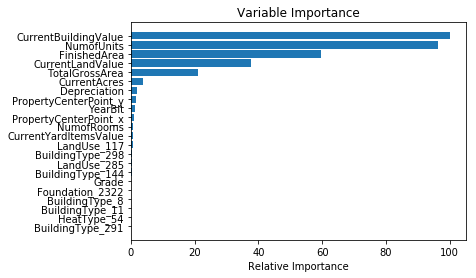

In [18]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##### Top features are CurrentBuildingValue, NumofUnits, FinishedArea, CurrentLandValue, TotalGrossArea. (Both in the full model and in the simplified model).

#### By tuning the paraneters of the gradient boosting regressor, we can develop better models in terms of accuracy.

##### We start by setting the loss function to be 'huber' (default is 'ls') with alpha = 0.9 and n_estimators = 100 (default settings).

##### The alpha is a parameter that sets the weights of MeanSquareError and LeastAbsoluteDeviation. Hence centain alphas(check official document to confirm low or high) are meant to produce lower MSEs (but for the training set only, not for the test set!)

##### We value smaller MSE over smaller Average Percentage Error. The reason is accurate predictions of prices of housing properties with relatively low values is less important to accurate predictions of those with relatively high values.

In [19]:
# Initial model 
reg0 = GradientBoostingRegressor(random_state=0)
reg0.fit(X_train, y_train)
mse0 = mean_squared_error(y_test, reg0.predict(X_test))
ape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best model and parameters
bestreg = reg0
bestmse = mse0
bestape = ape0
best_n_est = 100 # default
bestdepth = 3 # default
bestalpha = 0.9 # default
 
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(50,125,25)
Depth = np.arange(1,11,1)
Alpha = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            print("n_est = %.0f" % n_est)
            print("d = %.0f" % d)
            print("alpha = %.1f" % alp)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestalpha = alp

print("best n_estimators = %.0f" % best_n_est)           
print("best depth = %.0f" % bestdepth)
print("best alpha = %.1f" % bestalpha)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)      

n_est = 50
d = 1
alpha = 0.1
mse = 20026534437.3266
ape = 0.3848
__________________________________
n_est = 50
d = 1
alpha = 0.2
mse = 20015492344.0578
ape = 0.3861
__________________________________
n_est = 50
d = 1
alpha = 0.3
mse = 19496626600.7362
ape = 0.3868
__________________________________
n_est = 50
d = 1
alpha = 0.4
mse = 19543774421.8970
ape = 0.3869
__________________________________
n_est = 50
d = 1
alpha = 0.5
mse = 19114710009.6774
ape = 0.3879
__________________________________
n_est = 50
d = 1
alpha = 0.6
mse = 18924735179.6409
ape = 0.3886
__________________________________
n_est = 50
d = 1
alpha = 0.7
mse = 18291383898.9030
ape = 0.3926
__________________________________
n_est = 50
d = 1
alpha = 0.8
mse = 17674773020.8245
ape = 0.3928
__________________________________
n_est = 50
d = 1
alpha = 0.9
mse = 16879103352.4170
ape = 0.3611
__________________________________
n_est = 50
d = 2
alpha = 0.1
mse = 14754342655.9649
ape = 0.2376
__________________________________


n_est = 50
d = 10
alpha = 0.2
mse = 13777250491.0388
ape = 0.2071
__________________________________
n_est = 50
d = 10
alpha = 0.3
mse = 12198590132.7380
ape = 0.2083
__________________________________
n_est = 50
d = 10
alpha = 0.4
mse = 10910826492.3586
ape = 0.2031
__________________________________
n_est = 50
d = 10
alpha = 0.5
mse = 12536697433.0793
ape = 0.2066
__________________________________
n_est = 50
d = 10
alpha = 0.6
mse = 12880069985.3487
ape = 0.2045
__________________________________
n_est = 50
d = 10
alpha = 0.7
mse = 12042512974.1285
ape = 0.2021
__________________________________
n_est = 50
d = 10
alpha = 0.8
mse = 14125592203.6360
ape = 0.2126
__________________________________
n_est = 50
d = 10
alpha = 0.9
mse = 11094777830.8106
ape = 0.2083
__________________________________
n_est = 75
d = 1
alpha = 0.1
mse = 16911839568.3455
ape = 0.3482
__________________________________
n_est = 75
d = 1
alpha = 0.2
mse = 16583223547.7476
ape = 0.3520
___________________________

n_est = 75
d = 9
alpha = 0.3
mse = 12004446842.1970
ape = 0.2109
__________________________________
n_est = 75
d = 9
alpha = 0.4
mse = 12476770613.2655
ape = 0.2055
__________________________________
n_est = 75
d = 9
alpha = 0.5
mse = 12776094469.0539
ape = 0.2072
__________________________________
n_est = 75
d = 9
alpha = 0.6
mse = 11244684896.8919
ape = 0.2058
__________________________________
n_est = 75
d = 9
alpha = 0.7
mse = 28479027852.1079
ape = 0.2172
__________________________________
n_est = 75
d = 9
alpha = 0.8
mse = 12435317709.3499
ape = 0.2080
__________________________________
n_est = 75
d = 9
alpha = 0.9
mse = 11250530233.9515
ape = 0.2026
__________________________________
n_est = 75
d = 10
alpha = 0.1
mse = 16450700133.7139
ape = 0.2131
__________________________________
n_est = 75
d = 10
alpha = 0.2
mse = 13773632882.0262
ape = 0.2066
__________________________________
n_est = 75
d = 10
alpha = 0.3
mse = 12015562061.4966
ape = 0.2069
________________________________

n_est = 100
d = 8
alpha = 0.4
mse = 11862372349.4637
ape = 0.2046
__________________________________
n_est = 100
d = 8
alpha = 0.5
mse = 11028510999.2962
ape = 0.2043
__________________________________
n_est = 100
d = 8
alpha = 0.6
mse = 10284381459.1888
ape = 0.2018
__________________________________
n_est = 100
d = 8
alpha = 0.7
mse = 11988213963.5493
ape = 0.2072
__________________________________
n_est = 100
d = 8
alpha = 0.8
mse = 12063038068.2035
ape = 0.2094
__________________________________
n_est = 100
d = 8
alpha = 0.9
mse = 11620466986.1529
ape = 0.2060
__________________________________
n_est = 100
d = 9
alpha = 0.1
mse = 12237021923.1553
ape = 0.2279
__________________________________
n_est = 100
d = 9
alpha = 0.2
mse = 11184754029.1757
ape = 0.2030
__________________________________
n_est = 100
d = 9
alpha = 0.3
mse = 11753264228.0542
ape = 0.2129
__________________________________
n_est = 100
d = 9
alpha = 0.4
mse = 12420672433.6168
ape = 0.2054
_________________________

##### Continue Searching

In [20]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(125,225,25)
Depth = np.arange(1,11,1)
Alpha = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            print("n_est = %.0f" % n_est)
            print("d = %.0f" % d)
            print("alpha = %.1f" % alp)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestalpha = alp

print("best n_estimators = %.0f" % best_n_est)           
print("best depth = %.0f" % bestdepth)
print("best alpha = %.1f" % bestalpha)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)    

n_est = 125
d = 1
alpha = 0.1
mse = 14738955785.1186
ape = 0.2199
__________________________________
n_est = 125
d = 1
alpha = 0.2
mse = 14546992054.0116
ape = 0.2210
__________________________________
n_est = 125
d = 1
alpha = 0.3
mse = 14300367946.1707
ape = 0.2217
__________________________________
n_est = 125
d = 1
alpha = 0.4
mse = 14291738913.2612
ape = 0.2231
__________________________________
n_est = 125
d = 1
alpha = 0.5
mse = 14308500419.2998
ape = 0.2264
__________________________________
n_est = 125
d = 1
alpha = 0.6
mse = 14000277284.8026
ape = 0.2308
__________________________________
n_est = 125
d = 1
alpha = 0.7
mse = 13949325707.5747
ape = 0.2362
__________________________________
n_est = 125
d = 1
alpha = 0.8
mse = 13847792301.0492
ape = 0.2362
__________________________________
n_est = 125
d = 1
alpha = 0.9
mse = 13115912083.4618
ape = 0.2406
__________________________________
n_est = 125
d = 2
alpha = 0.1
mse = 12281678000.6501
ape = 0.2007
_________________________

n_est = 125
d = 10
alpha = 0.2
mse = 13902275026.2277
ape = 0.2065
__________________________________
n_est = 125
d = 10
alpha = 0.3
mse = 12129253477.8537
ape = 0.2086
__________________________________
n_est = 125
d = 10
alpha = 0.4
mse = 10141015614.2449
ape = 0.2028
__________________________________
n_est = 125
d = 10
alpha = 0.5
mse = 11231181303.2000
ape = 0.2070
__________________________________
n_est = 125
d = 10
alpha = 0.6
mse = 13151270837.9408
ape = 0.2068
__________________________________
n_est = 125
d = 10
alpha = 0.7
mse = 12040305217.0105
ape = 0.2017
__________________________________
n_est = 125
d = 10
alpha = 0.8
mse = 14098817647.3915
ape = 0.2133
__________________________________
n_est = 125
d = 10
alpha = 0.9
mse = 11106157249.2134
ape = 0.2079
__________________________________
n_est = 150
d = 1
alpha = 0.1
mse = 14129309285.9290
ape = 0.2111
__________________________________
n_est = 150
d = 1
alpha = 0.2
mse = 14062876224.9553
ape = 0.2112
_________________

n_est = 150
d = 9
alpha = 0.3
mse = 11793276574.7248
ape = 0.2132
__________________________________
n_est = 150
d = 9
alpha = 0.4
mse = 12142496869.1852
ape = 0.2063
__________________________________
n_est = 150
d = 9
alpha = 0.5
mse = 12656354201.8521
ape = 0.2077
__________________________________
n_est = 150
d = 9
alpha = 0.6
mse = 11487266152.0445
ape = 0.2075
__________________________________
n_est = 150
d = 9
alpha = 0.7
mse = 28298035452.9086
ape = 0.2178
__________________________________
n_est = 150
d = 9
alpha = 0.8
mse = 12416443927.2916
ape = 0.2080
__________________________________
n_est = 150
d = 9
alpha = 0.9
mse = 11205050254.7961
ape = 0.2034
__________________________________
n_est = 150
d = 10
alpha = 0.1
mse = 16458608215.3804
ape = 0.2140
__________________________________
n_est = 150
d = 10
alpha = 0.2
mse = 13946467298.9801
ape = 0.2065
__________________________________
n_est = 150
d = 10
alpha = 0.3
mse = 12095896408.3291
ape = 0.2086
______________________

n_est = 175
d = 8
alpha = 0.4
mse = 11790412277.6685
ape = 0.2054
__________________________________
n_est = 175
d = 8
alpha = 0.5
mse = 10632251704.2699
ape = 0.2057
__________________________________
n_est = 175
d = 8
alpha = 0.6
mse = 10212519485.1326
ape = 0.2030
__________________________________
n_est = 175
d = 8
alpha = 0.7
mse = 11938752903.9760
ape = 0.2067
__________________________________
n_est = 175
d = 8
alpha = 0.8
mse = 11985438385.7986
ape = 0.2070
__________________________________
n_est = 175
d = 8
alpha = 0.9
mse = 11762407450.1948
ape = 0.2053
__________________________________
n_est = 175
d = 9
alpha = 0.1
mse = 12069474492.3947
ape = 0.2282
__________________________________
n_est = 175
d = 9
alpha = 0.2
mse = 11177213840.8160
ape = 0.2033
__________________________________
n_est = 175
d = 9
alpha = 0.3
mse = 11756850455.1376
ape = 0.2137
__________________________________
n_est = 175
d = 9
alpha = 0.4
mse = 12147530382.6168
ape = 0.2066
_________________________

n_est = 200
d = 7
alpha = 0.5
mse = 11061516022.4038
ape = 0.2004
__________________________________
n_est = 200
d = 7
alpha = 0.6
mse = 11004923842.4105
ape = 0.2030
__________________________________
n_est = 200
d = 7
alpha = 0.7
mse = 10941325701.5775
ape = 0.2052
__________________________________
n_est = 200
d = 7
alpha = 0.8
mse = 22617544383.0840
ape = 0.2120
__________________________________
n_est = 200
d = 7
alpha = 0.9
mse = 11269408546.9008
ape = 0.2067
__________________________________
n_est = 200
d = 8
alpha = 0.1
mse = 13066830475.9545
ape = 0.2144
__________________________________
n_est = 200
d = 8
alpha = 0.2
mse = 11149781598.1422
ape = 0.2063
__________________________________
n_est = 200
d = 8
alpha = 0.3
mse = 12663743518.8895
ape = 0.2104
__________________________________
n_est = 200
d = 8
alpha = 0.4
mse = 11822947226.5020
ape = 0.2060
__________________________________
n_est = 200
d = 8
alpha = 0.5
mse = 10637820697.9048
ape = 0.2062
_________________________

##### Continue Searching

In [21]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(225,325,25)
Depth = np.arange(1,11,1)
Alpha = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            print("n_est = %.0f" % n_est)
            print("d = %.0f" % d)
            print("alpha = %.1f" % alp)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestalpha = alp

print("best n_estimators = %.0f" % best_n_est)           
print("best depth = %.0f" % bestdepth)
print("best alpha = %.1f" % bestalpha)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)    

n_est = 225
d = 1
alpha = 0.1
mse = 13852762769.5709
ape = 0.2041
__________________________________
n_est = 225
d = 1
alpha = 0.2
mse = 13778242152.9375
ape = 0.2023
__________________________________
n_est = 225
d = 1
alpha = 0.3
mse = 13719927217.5619
ape = 0.2029
__________________________________
n_est = 225
d = 1
alpha = 0.4
mse = 13762894998.4485
ape = 0.2035
__________________________________
n_est = 225
d = 1
alpha = 0.5
mse = 13629842137.3810
ape = 0.2046
__________________________________
n_est = 225
d = 1
alpha = 0.6
mse = 13229446136.6713
ape = 0.2073
__________________________________
n_est = 225
d = 1
alpha = 0.7
mse = 12429810045.6917
ape = 0.2102
__________________________________
n_est = 225
d = 1
alpha = 0.8
mse = 12199037779.2890
ape = 0.2118
__________________________________
n_est = 225
d = 1
alpha = 0.9
mse = 12390174640.8157
ape = 0.2153
__________________________________
n_est = 225
d = 2
alpha = 0.1
mse = 12269679188.6650
ape = 0.2013
_________________________

n_est = 225
d = 10
alpha = 0.2
mse = 14163629224.0119
ape = 0.2076
__________________________________
n_est = 225
d = 10
alpha = 0.3
mse = 12100642667.3448
ape = 0.2086
__________________________________
n_est = 225
d = 10
alpha = 0.4
mse = 9869547714.5706
ape = 0.2038
__________________________________
n_est = 225
d = 10
alpha = 0.5
mse = 11276770479.5990
ape = 0.2085
__________________________________
n_est = 225
d = 10
alpha = 0.6
mse = 13208326710.6613
ape = 0.2078
__________________________________
n_est = 225
d = 10
alpha = 0.7
mse = 12031913565.9926
ape = 0.2024
__________________________________
n_est = 225
d = 10
alpha = 0.8
mse = 14148015719.0202
ape = 0.2137
__________________________________
n_est = 225
d = 10
alpha = 0.9
mse = 11111335016.7243
ape = 0.2084
__________________________________
n_est = 250
d = 1
alpha = 0.1
mse = 13834760354.5448
ape = 0.2032
__________________________________
n_est = 250
d = 1
alpha = 0.2
mse = 13779128682.8079
ape = 0.2017
__________________

n_est = 250
d = 9
alpha = 0.3
mse = 11778907917.7578
ape = 0.2132
__________________________________
n_est = 250
d = 9
alpha = 0.4
mse = 11965747186.0567
ape = 0.2073
__________________________________
n_est = 250
d = 9
alpha = 0.5
mse = 12710294025.4094
ape = 0.2086
__________________________________
n_est = 250
d = 9
alpha = 0.6
mse = 11500521062.8779
ape = 0.2073
__________________________________
n_est = 250
d = 9
alpha = 0.7
mse = 28342014934.3742
ape = 0.2191
__________________________________
n_est = 250
d = 9
alpha = 0.8
mse = 12456726247.4612
ape = 0.2068
__________________________________
n_est = 250
d = 9
alpha = 0.9
mse = 11270261290.1807
ape = 0.2049
__________________________________
n_est = 250
d = 10
alpha = 0.1
mse = 19021921761.6639
ape = 0.2156
__________________________________
n_est = 250
d = 10
alpha = 0.2
mse = 14141166207.6392
ape = 0.2077
__________________________________
n_est = 250
d = 10
alpha = 0.3
mse = 12120923367.3643
ape = 0.2088
______________________

n_est = 275
d = 8
alpha = 0.4
mse = 11827320061.1174
ape = 0.2069
__________________________________
n_est = 275
d = 8
alpha = 0.5
mse = 10596407416.2064
ape = 0.2070
__________________________________
n_est = 275
d = 8
alpha = 0.6
mse = 10176658939.5366
ape = 0.2035
__________________________________
n_est = 275
d = 8
alpha = 0.7
mse = 11920756308.9950
ape = 0.2096
__________________________________
n_est = 275
d = 8
alpha = 0.8
mse = 11992386511.7160
ape = 0.2076
__________________________________
n_est = 275
d = 8
alpha = 0.9
mse = 11749986489.2428
ape = 0.2065
__________________________________
n_est = 275
d = 9
alpha = 0.1
mse = 11989971072.9111
ape = 0.2283
__________________________________
n_est = 275
d = 9
alpha = 0.2
mse = 11099591245.5566
ape = 0.2051
__________________________________
n_est = 275
d = 9
alpha = 0.3
mse = 11814089105.9658
ape = 0.2137
__________________________________
n_est = 275
d = 9
alpha = 0.4
mse = 11992923712.3728
ape = 0.2083
_________________________

n_est = 300
d = 7
alpha = 0.5
mse = 11021042192.6852
ape = 0.2003
__________________________________
n_est = 300
d = 7
alpha = 0.6
mse = 11017661703.3219
ape = 0.2059
__________________________________
n_est = 300
d = 7
alpha = 0.7
mse = 10966064347.0327
ape = 0.2063
__________________________________
n_est = 300
d = 7
alpha = 0.8
mse = 22684690365.7943
ape = 0.2142
__________________________________
n_est = 300
d = 7
alpha = 0.9
mse = 11388919787.0019
ape = 0.2092
__________________________________
n_est = 300
d = 8
alpha = 0.1
mse = 13104237594.7042
ape = 0.2148
__________________________________
n_est = 300
d = 8
alpha = 0.2
mse = 11078299535.9745
ape = 0.2062
__________________________________
n_est = 300
d = 8
alpha = 0.3
mse = 12453132629.0351
ape = 0.2116
__________________________________
n_est = 300
d = 8
alpha = 0.4
mse = 11824128320.6274
ape = 0.2072
__________________________________
n_est = 300
d = 8
alpha = 0.5
mse = 10579203605.8352
ape = 0.2071
_________________________

##### Continue Searching

In [22]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(325,425,25)
Depth = np.arange(1,11,1)
Alpha = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            print("n_est = %.0f" % n_est)
            print("d = %.0f" % d)
            print("alpha = %.1f" % alp)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestalpha = alp

print("best n_estimators = %.0f" % best_n_est)           
print("best depth = %.0f" % bestdepth)
print("best alpha = %.1f" % bestalpha)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse) 

n_est = 325
d = 1
alpha = 0.1
mse = 12678771081.6625
ape = 0.2006
__________________________________
n_est = 325
d = 1
alpha = 0.2
mse = 12636893817.5269
ape = 0.1994
__________________________________
n_est = 325
d = 1
alpha = 0.3
mse = 12541228767.8923
ape = 0.1988
__________________________________
n_est = 325
d = 1
alpha = 0.4
mse = 12472896981.7375
ape = 0.1992
__________________________________
n_est = 325
d = 1
alpha = 0.5
mse = 12397340259.6322
ape = 0.1992
__________________________________
n_est = 325
d = 1
alpha = 0.6
mse = 12205867715.0345
ape = 0.1987
__________________________________
n_est = 325
d = 1
alpha = 0.7
mse = 12273829950.2821
ape = 0.2008
__________________________________
n_est = 325
d = 1
alpha = 0.8
mse = 12043220637.0543
ape = 0.2025
__________________________________
n_est = 325
d = 1
alpha = 0.9
mse = 12286253806.3363
ape = 0.2071
__________________________________
n_est = 325
d = 2
alpha = 0.1
mse = 12036716227.1540
ape = 0.2028
_________________________

n_est = 325
d = 10
alpha = 0.2
mse = 14175147701.5494
ape = 0.2081
__________________________________
n_est = 325
d = 10
alpha = 0.3
mse = 12125137170.8414
ape = 0.2092
__________________________________
n_est = 325
d = 10
alpha = 0.4
mse = 9797532191.5689
ape = 0.2034
__________________________________
n_est = 325
d = 10
alpha = 0.5
mse = 11499644074.7913
ape = 0.2099
__________________________________
n_est = 325
d = 10
alpha = 0.6
mse = 13238422122.0862
ape = 0.2087
__________________________________
n_est = 325
d = 10
alpha = 0.7
mse = 12047777223.2442
ape = 0.2039
__________________________________
n_est = 325
d = 10
alpha = 0.8
mse = 14187558725.3049
ape = 0.2147
__________________________________
n_est = 325
d = 10
alpha = 0.9
mse = 11152268188.2863
ape = 0.2092
__________________________________
n_est = 350
d = 1
alpha = 0.1
mse = 12661021754.6938
ape = 0.2001
__________________________________
n_est = 350
d = 1
alpha = 0.2
mse = 12617739892.7009
ape = 0.1987
__________________

n_est = 350
d = 9
alpha = 0.3
mse = 11766719937.9477
ape = 0.2134
__________________________________
n_est = 350
d = 9
alpha = 0.4
mse = 11948270805.9485
ape = 0.2079
__________________________________
n_est = 350
d = 9
alpha = 0.5
mse = 12697816791.8977
ape = 0.2110
__________________________________
n_est = 350
d = 9
alpha = 0.6
mse = 11516421819.7609
ape = 0.2074
__________________________________
n_est = 350
d = 9
alpha = 0.7
mse = 28389821127.9786
ape = 0.2204
__________________________________
n_est = 350
d = 9
alpha = 0.8
mse = 12520580154.6901
ape = 0.2088
__________________________________
n_est = 350
d = 9
alpha = 0.9
mse = 11304854166.6700
ape = 0.2056
__________________________________
n_est = 350
d = 10
alpha = 0.1
mse = 19012732235.1383
ape = 0.2148
__________________________________
n_est = 350
d = 10
alpha = 0.2
mse = 14178849714.4823
ape = 0.2083
__________________________________
n_est = 350
d = 10
alpha = 0.3
mse = 12105358223.7068
ape = 0.2092
______________________

n_est = 375
d = 8
alpha = 0.4
mse = 11791341406.4735
ape = 0.2076
__________________________________
n_est = 375
d = 8
alpha = 0.5
mse = 10585715368.2490
ape = 0.2082
__________________________________
n_est = 375
d = 8
alpha = 0.6
mse = 10222565805.0991
ape = 0.2050
__________________________________
n_est = 375
d = 8
alpha = 0.7
mse = 11889696165.6286
ape = 0.2118
__________________________________
n_est = 375
d = 8
alpha = 0.8
mse = 12112573306.1102
ape = 0.2093
__________________________________
n_est = 375
d = 8
alpha = 0.9
mse = 11775412161.7477
ape = 0.2073
__________________________________
n_est = 375
d = 9
alpha = 0.1
mse = 12022393766.0125
ape = 0.2279
__________________________________
n_est = 375
d = 9
alpha = 0.2
mse = 11123501518.7030
ape = 0.2062
__________________________________
n_est = 375
d = 9
alpha = 0.3
mse = 11716980879.9614
ape = 0.2132
__________________________________
n_est = 375
d = 9
alpha = 0.4
mse = 11987095718.6133
ape = 0.2081
_________________________

n_est = 400
d = 7
alpha = 0.5
mse = 11117344048.2502
ape = 0.2014
__________________________________
n_est = 400
d = 7
alpha = 0.6
mse = 11038727721.0218
ape = 0.2073
__________________________________
n_est = 400
d = 7
alpha = 0.7
mse = 10989546028.3438
ape = 0.2090
__________________________________
n_est = 400
d = 7
alpha = 0.8
mse = 22807057482.4364
ape = 0.2152
__________________________________
n_est = 400
d = 7
alpha = 0.9
mse = 11473123933.9244
ape = 0.2103
__________________________________
n_est = 400
d = 8
alpha = 0.1
mse = 13103853258.3681
ape = 0.2145
__________________________________
n_est = 400
d = 8
alpha = 0.2
mse = 11063846434.4829
ape = 0.2062
__________________________________
n_est = 400
d = 8
alpha = 0.3
mse = 12527941427.0132
ape = 0.2106
__________________________________
n_est = 400
d = 8
alpha = 0.4
mse = 11785417719.2876
ape = 0.2077
__________________________________
n_est = 400
d = 8
alpha = 0.5
mse = 10560733434.1568
ape = 0.2078
_________________________

##### Continue Searching

In [23]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(425,525,25)
Depth = np.arange(1,11,1)
Alpha = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            print("n_est = %.0f" % n_est)
            print("d = %.0f" % d)
            print("alpha = %.1f" % alp)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestalpha = alp

print("best n_estimators = %.0f" % best_n_est)           
print("best depth = %.0f" % bestdepth)
print("best alpha = %.1f" % bestalpha)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse) 

n_est = 425
d = 1
alpha = 0.1
mse = 12640468261.6214
ape = 0.1994
__________________________________
n_est = 425
d = 1
alpha = 0.2
mse = 12052448835.8206
ape = 0.1976
__________________________________
n_est = 425
d = 1
alpha = 0.3
mse = 11994088296.6723
ape = 0.1986
__________________________________
n_est = 425
d = 1
alpha = 0.4
mse = 12078566903.2860
ape = 0.1980
__________________________________
n_est = 425
d = 1
alpha = 0.5
mse = 12001443324.4138
ape = 0.1977
__________________________________
n_est = 425
d = 1
alpha = 0.6
mse = 12227341897.8710
ape = 0.1974
__________________________________
n_est = 425
d = 1
alpha = 0.7
mse = 12259688189.2779
ape = 0.1984
__________________________________
n_est = 425
d = 1
alpha = 0.8
mse = 12031023574.3013
ape = 0.1989
__________________________________
n_est = 425
d = 1
alpha = 0.9
mse = 12225756986.7689
ape = 0.2017
__________________________________
n_est = 425
d = 2
alpha = 0.1
mse = 12454292344.1164
ape = 0.2036
_________________________

n_est = 425
d = 10
alpha = 0.2
mse = 14167399780.5762
ape = 0.2088
__________________________________
n_est = 425
d = 10
alpha = 0.3
mse = 12086548141.1255
ape = 0.2092
__________________________________
n_est = 425
d = 10
alpha = 0.4
mse = 9805394438.4938
ape = 0.2043
__________________________________
n_est = 425
d = 10
alpha = 0.5
mse = 11560907284.2641
ape = 0.2108
__________________________________
n_est = 425
d = 10
alpha = 0.6
mse = 13233720140.9632
ape = 0.2086
__________________________________
n_est = 425
d = 10
alpha = 0.7
mse = 12071631814.8419
ape = 0.2050
__________________________________
n_est = 425
d = 10
alpha = 0.8
mse = 14196605069.9102
ape = 0.2148
__________________________________
n_est = 425
d = 10
alpha = 0.9
mse = 11165847722.5737
ape = 0.2101
__________________________________
n_est = 450
d = 1
alpha = 0.1
mse = 12644742949.5461
ape = 0.1989
__________________________________
n_est = 450
d = 1
alpha = 0.2
mse = 11759901148.4453
ape = 0.1973
__________________

n_est = 450
d = 9
alpha = 0.3
mse = 11734113289.8325
ape = 0.2132
__________________________________
n_est = 450
d = 9
alpha = 0.4
mse = 11993813531.5585
ape = 0.2082
__________________________________
n_est = 450
d = 9
alpha = 0.5
mse = 12767366429.9120
ape = 0.2128
__________________________________
n_est = 450
d = 9
alpha = 0.6
mse = 11570672876.0603
ape = 0.2079
__________________________________
n_est = 450
d = 9
alpha = 0.7
mse = 28433560077.4220
ape = 0.2194
__________________________________
n_est = 450
d = 9
alpha = 0.8
mse = 12563590246.7724
ape = 0.2103
__________________________________
n_est = 450
d = 9
alpha = 0.9
mse = 11333020227.8644
ape = 0.2062
__________________________________
n_est = 450
d = 10
alpha = 0.1
mse = 18938692659.4819
ape = 0.2149
__________________________________
n_est = 450
d = 10
alpha = 0.2
mse = 14174989382.5805
ape = 0.2095
__________________________________
n_est = 450
d = 10
alpha = 0.3
mse = 12080585137.6640
ape = 0.2091
______________________

n_est = 475
d = 8
alpha = 0.4
mse = 11815350147.8683
ape = 0.2090
__________________________________
n_est = 475
d = 8
alpha = 0.5
mse = 10580722488.8141
ape = 0.2089
__________________________________
n_est = 475
d = 8
alpha = 0.6
mse = 10356544740.4213
ape = 0.2062
__________________________________
n_est = 475
d = 8
alpha = 0.7
mse = 11911812499.5255
ape = 0.2131
__________________________________
n_est = 475
d = 8
alpha = 0.8
mse = 12170914095.0881
ape = 0.2105
__________________________________
n_est = 475
d = 8
alpha = 0.9
mse = 11795035621.3589
ape = 0.2084
__________________________________
n_est = 475
d = 9
alpha = 0.1
mse = 12097066908.4203
ape = 0.2282
__________________________________
n_est = 475
d = 9
alpha = 0.2
mse = 11064609804.6347
ape = 0.2063
__________________________________
n_est = 475
d = 9
alpha = 0.3
mse = 11729413395.3730
ape = 0.2134
__________________________________
n_est = 475
d = 9
alpha = 0.4
mse = 11996630342.4445
ape = 0.2082
_________________________

n_est = 500
d = 7
alpha = 0.5
mse = 11202806055.1371
ape = 0.2027
__________________________________
n_est = 500
d = 7
alpha = 0.6
mse = 11164900427.6600
ape = 0.2095
__________________________________
n_est = 500
d = 7
alpha = 0.7
mse = 11084013579.1809
ape = 0.2114
__________________________________
n_est = 500
d = 7
alpha = 0.8
mse = 22834908726.7184
ape = 0.2155
__________________________________
n_est = 500
d = 7
alpha = 0.9
mse = 11445927199.2828
ape = 0.2104
__________________________________
n_est = 500
d = 8
alpha = 0.1
mse = 13131911332.5069
ape = 0.2152
__________________________________
n_est = 500
d = 8
alpha = 0.2
mse = 11039435041.2828
ape = 0.2054
__________________________________
n_est = 500
d = 8
alpha = 0.3
mse = 12531423080.2079
ape = 0.2097
__________________________________
n_est = 500
d = 8
alpha = 0.4
mse = 11852307730.8975
ape = 0.2092
__________________________________
n_est = 500
d = 8
alpha = 0.5
mse = 10586374884.7042
ape = 0.2089
_________________________

##### We have searched through the Gradient boosting models with 'huber' as the loss function, n_estimators from 50 to 500 with a step size of 25, the max depth of trees from 1 to 10 and alpha from 0.1 to 0.9 with a step size of 0.1. We've found the model with the least Mean Squared Error: the model with n_estimators = 75, max_depth = 6, alpha = 0.9. The MSE for this model is  9653647785.6226 and the corresponding average percentage of absolute error is 20.18%.

##### There are models that have average percentages less than 20% though, with a relatively low MSE. They are also condidered as good models. One such example is the model with n_estismators = 125, max_depth = 4, alpha = 0.9, mse = 9960238822.3960, ape(Average Percentage Error) = 0.1960.